In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
file = 'wind'
area = 'DK1'
fileName = file + "_" + area

file_uppercase = 'Wind power'
file_lowercase = 'wind power'

#config
save_plots = True

data = pd.read_csv("../../../data/data_sanitized/"+fileName+".csv") 
data['date']= pd.to_datetime(data['date'],format='%Y-%m-%d')
str_week_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ylabel = file_uppercase+' [MWh]'
ylabelTWh = file_uppercase+' [TWh]'

title = {}
title['avg_consumption_each_year'] = 'Average '+file_lowercase+' for each hour for years 2016-2020 (' + area + ")"
title['total_consumption_2019'] = 'Total '+file_lowercase+' per day for 2019 (' + area + ")"
title['total_consumption_2016_2019'] = 'Total '+file_lowercase+' for years 2016-2019 (' + area + ")"
title['median_per_dayofweek'] = 'Median '+file_lowercase+' for years 2016-2020 (' + area + ")"
title['std_per_dayofweek'] = 'Standard deviation of '+file_lowercase+' for years 2016-2020 (' + area + ")"
title['sma_per_dayofyear'] = 'Simple Moving Average for 14 days window (' + area + ")"
title['avg_per_dayofweek'] = 'Average '+file_lowercase+' for years 2016-2020 (' + area + ")"
global_title = 'Average '+file_lowercase+' for years 2016-2020 (' + area + ")"

data['dayofweek'] = data['date'].dt.dayofweek
data['year'] = data['date'].dt.year
data['dayofyear'] = data['date'].dt.dayofyear


data

,date,holiday,0,1,2,3,4,5,6,7,...,17,18,19,20,21,22,23,dayofweek,year,dayofyear
0,2016-01-01,1,1314.0,1267.0,1159.0,1160.0,1069.0,1013.0,881.0,752.0,...,94.0,114.0,149.0,192.0,321.0,718.0,932.0,4,2016,1
1,2016-01-02,0,1049.0,1226.0,1601.0,1995.0,2225.0,2279.0,2484.0,2655.0,...,3192.0,3185.0,3166.0,3118.0,3117.0,3028.0,3136.0,5,2016,2
2,2016-01-03,1,3144.0,2772.0,3130.0,3128.0,3119.0,3091.0,3090.0,3122.0,...,2974.0,2970.0,2932.0,2760.0,2808.0,2849.0,2903.0,6,2016,3
3,2016-01-04,0,2896.0,2886.0,2886.0,2887.0,2899.0,2834.0,2828.0,2738.0,...,2445.0,2478.0,2445.0,2484.0,2409.0,2338.0,2290.0,0,2016,4
4,2016-01-05,0,2257.0,2255.0,2291.0,2296.0,2314.0,2250.0,2289.0,2347.0,...,1819.0,1859.0,1793.0,1738.0,1660.0,1524.0,1451.0,1,2016,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,2020-05-08,1,998.0,1082.0,1084.0,1171.0,1244.0,1317.0,1288.0,921.0,...,1361.0,1257.0,1078.0,858.0,811.0,774.0,740.0,4,2020,129
1590,2020-05-09,0,636.0,563.0,506.0,459.0,381.0,356.0,286.0,240.0,...,230.0,175.0,132.0,89.0,70.0,85.0,75.0,5,2020,130
1591,2020-05-10,1,72.0,100.0,151.0,326.0,624.0,799.0,885.0,784.0,...,2320.0,2309.0,2000.0,1810.0,1503.0,1296.0,1411.0,6,2020,131
1592,2020-05-11,0,1430.0,1515.0,1733.0,1351.0,1617.0,1204.0,1097.0,1225.0,...,1505.0,1939.0,1820.0,1416.0,1356.0,1412.0,1504.0,0,2020,132


In [4]:
def savePlot(name):
    if(save_plots):
        fileName = '../plots/'+ name + '_' + area
        plt.savefig(fileName, bbox_inches='tight')

In [5]:
def draw_plot_hour(data_serie):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    # for column in columns:
    ax.plot(data_serie)
    # set title and legend
    ax.set_title('Plot')
    ax.legend()
    
def draw_plot_hour_for_year(data_frame, name='Plot', ylabel = 'y ax'):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    plt.rc('ytick', labelsize=22)
    # plot each column
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for index, row in data_frame.iterrows():
        ax.plot(data_frame.loc[index], label=data_frame.loc[index].name)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 20})
    ax.set_xlabel('Hour')
    ax.set_ylabel(ylabel)
    plt.rcParams.update({'font.size': 24})
    
def draw_two_plots_hour_for_year(data_frame, name=['Plot','Plot'], ylabel = 'y lab', global_title=global_title):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots(nrows=2)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    st = fig.suptitle(global_title, fontsize="x-large")
    st.set_y(0.95)
    
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for holiday, new_df in data_frame.groupby(level=0):
        for index, row in new_df.iterrows():
            ax[index[0]].plot(new_df.loc[index], label=new_df.loc[index].name[1])
            ax[index[0]].set_title(name[index[0]])
            # set title and legend
            ax[index[0]].legend(prop={'size': 15})
            ax[index[0]].set_xlabel('Hour')
            ax[index[0]].set_ylabel(ylabel)

def draw_7_plots_hour_for_year(data_frame, name='Plot', ylabel = 'y lab', global_title=global_title):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots(4, 2,sharey=True)
    fig.delaxes(ax[3,1])
    fig.set_figheight(14)
    fig.set_figwidth(20)
    fig.subplots_adjust(hspace=0.4)
    plt.rcParams.update({'font.size': 24})
    plt.rc('ytick', labelsize=18)
    plt.rc('xtick', labelsize=13)
    st = fig.suptitle(global_title, fontsize="x-large")
    st.set_y(0.95)
    
    fig.text(0.07,0.5, ylabel, ha="center", va="center", rotation=90)
    fig.text(0.5,0.09, 'Hour', ha="center", va="center")
    
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for workday, new_df in data_frame.groupby(level=0):
        plot_index = int(workday/2),int(workday%2)
        for index, row in new_df.iterrows():
            ax[plot_index].plot(new_df.loc[index], label=new_df.loc[index].name[1])
            ax[int(index[0]/2),int(index[0]%2)].set_title(name[index[0]])
            # set title and legend
            ax[plot_index].yaxis.set_tick_params(labelleft=True)
    plt.figlegend(list(set(data_frame.index.get_level_values('year')))[::-1],loc=(0.72,0.065),fontsize=22)
            
def draw_plot_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
    plt.rc('xtick', labelsize=22)
    ax.legend(prop={'size': 18})
    plt.rcParams.update({'font.size': 24})
            
def draw_simple_barplot_for_years(data_frame, name='Plot', ylabel = ylabel):
    fig, ax = plt.subplots()
    min_val = min(data_frame.iloc[:,0])
    max_val = max(data_frame.iloc[:,0])
    margin = (max_val - min_val)*3/10
    plt.ylim([min_val - margin,max_val + margin])
    ax.bar(data_frame.index,data_frame.iloc[:,0])
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(name)
    ax.set_xticks(data_frame.index)
    
def draw_plot_single_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    plt.rcParams.update({'font.size': 26})
    plt.rc('ytick', labelsize=20)
    plt.rc('xtick', labelsize=20)
    # plot each column
    ax.plot(data_frame, label=data_frame.index)
    # set title and legend
    ax.set_title(name)
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
    ax.set_xticks(ax.get_xticks()[::14])
    plt.xticks(rotation=90)

In [193]:
data_avg_by_year = data
data_avg_by_year['year']= data_avg_by_year['date'].dt.year
data_avg_by_year = data_avg_by_year.drop(columns=['holiday','date','dayofyear','dayofweek'])
data_avg_by_year = data_avg_by_year.groupby('year').mean()
data_avg_by_year

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
year,,,,,,,,,,,,,,,,,,,,,
2016,1718.918033,1659.002732,1633.897541,1636.139344,1666.603825,1769.103825,2044.857923,2353.934426,2499.131148,2530.445355,...,2408.614754,2344.412568,2376.155738,2544.338798,2501.830601,2368.133880,2241.857923,2129.139344,1992.450820,1835.185792
2017,1766.978082,1709.468493,1683.747945,1684.967123,1717.243836,1815.969863,2083.504110,2377.969863,2517.142466,2549.131507,...,2444.052055,2380.597260,2413.090411,2579.353425,2533.997260,2402.758904,2279.063014,2165.106849,2028.939726,1879.216438
2018,1874.326027,1816.400000,1789.100000,1789.364384,1819.090411,1914.136986,2172.693151,2456.750685,2596.509589,2630.660274,...,2555.663014,2499.345205,2530.608219,2686.794521,2638.832877,2499.460274,2377.186301,2259.791781,2125.493151,1980.536986
2019,1890.863014,1836.345205,1811.461644,1812.589041,1842.580822,1936.139726,2191.353425,2472.128767,2606.956164,2637.857534,...,2560.676712,2505.997260,2536.227397,2686.901370,2637.972603,2500.898630,2373.641096,2262.476712,2130.701370,1991.630137
2020,2025.345865,1975.511278,1955.921053,1959.248120,2001.992481,2107.308271,2353.323308,2638.744361,2766.593985,2789.721805,...,2676.413534,2617.736842,2649.586466,2846.293233,2821.278195,2663.812030,2524.796992,2407.398496,2261.233083,2118.947368


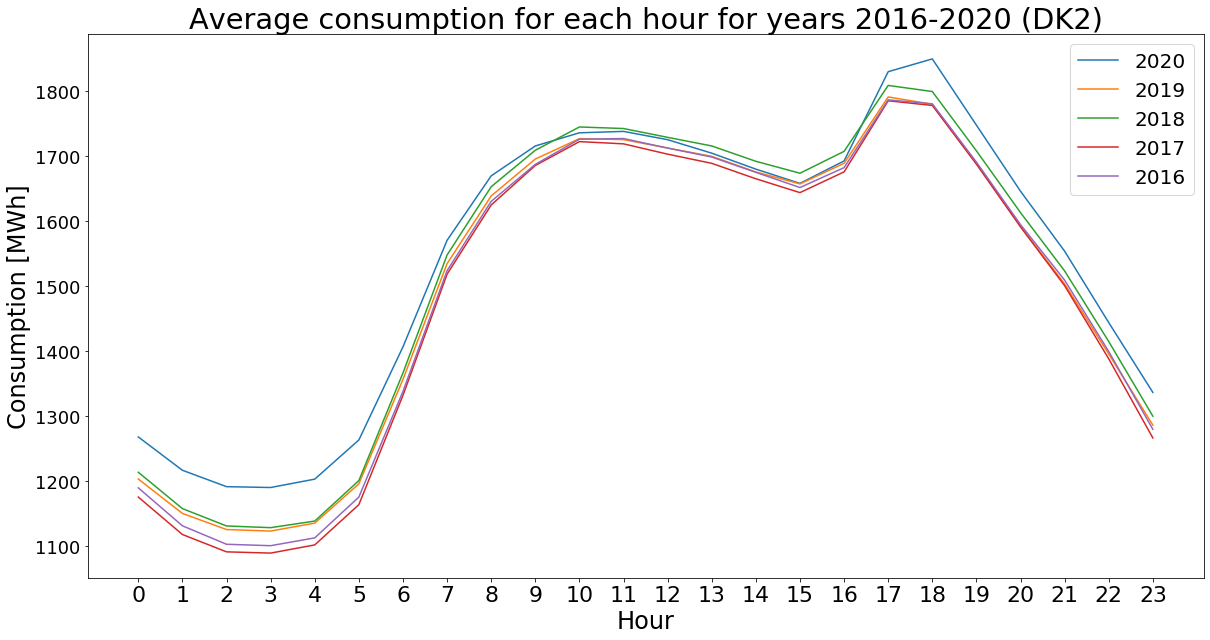

In [186]:
draw_plot_hour_for_year(data_avg_by_year, title['avg_consumption_each_year'], ylabel)
savePlot('avg_hour')

In [172]:
data_avg_by_year_per_holiday = data.copy()
data_avg_by_year_per_holiday = data_avg_by_year_per_holiday.drop(columns=['date','dayofyear','dayofweek'])
data_avg_by_year_per_holiday = data_avg_by_year_per_holiday.groupby(['holiday','year']).mean()
data_avg_by_year_per_holiday

0            1            2            3            4  \
holiday year                                                                    
0       2016  1743.314754  1684.160656  1660.442623  1664.672131  1699.754098   
        2017  1792.292763  1735.601974  1711.174342  1714.016447  1750.828947   
        2018  1898.215232  1841.579470  1815.307947  1818.072848  1852.771523   
        2019  1914.409241  1861.158416  1837.521452  1840.587459  1874.712871   
        2020  2053.238532  2003.568807  1984.036697  1989.871560  2038.871560   
1       2016  1596.934426  1533.213115  1501.172131  1493.475410  1500.852459   
        2017  1640.819672  1579.229508  1547.065574  1540.196721  1549.868852   
        2018  1759.809524  1695.698413  1663.468254  1651.746032  1657.634921   
        2019  1775.790323  1715.080645  1684.104839  1675.758065  1685.548387   
        2020  1898.666667  1848.083333  1828.229167  1820.166667  1834.500000   

                        5            6            7            8            9  \
holiday year                                                                    
0       2016  1817.209836  2131.452459  2473.793443  2615.770492  2634.331148   
        2017  1864.720395  2170.039474  2496.717105  2630.822368  2649.039474   
        2018  1962.708609  2257.960265  2573.089404  2709.129139  2729.933775   
        2019  1982.864686  2274.415842  2583.838284  2714.059406  2731.029703   
        2020  2159.100917  2441.596330  2759.605505  2884.146789  2892.036697   
1       2016  1528.573770  1611.885246  1754.639344  1915.934426  2011.016393   
        2017  1573.016393  1652.245902  1786.180328  1950.606557  2051.229508   
        2018  1681.301587  1763.952381  1899.063492  2056.650794  2154.777778   
        2019  1707.790323  1785.419355  1926.193548  2083.532258  2182.516129   
        2020  1872.083333  1952.416667  2089.833333  2232.708333  2325.041667   

              ...           14           15           16           17  \
holiday year  ...                                                       
0       2016  ...  2491.921311  2414.337705  2435.977049  2595.127869   
        2017  ...  2527.598684  2451.934211  2475.072368  2633.500000   
        2018  ...  2642.397351  2573.857616  2595.609272  2741.019868   
        2019  ...  2639.834983  2575.349835  2596.412541  2739.300330   
        2020  ...  2765.091743  2696.275229  2719.917431  2908.596330   
1       2016  ...  1992.081967  1994.786885  2077.049180  2290.393443   
        2017  ...  2027.688525  2025.081967  2104.196721  2309.508197   
        2018  ...  2139.888889  2142.158730  2219.015873  2426.857143   
        2019  ...  2173.822581  2167.064516  2242.096774  2430.822581   
        2020  ...  2273.666667  2261.041667  2330.166667  2563.333333   

                       18           19           20           21           22  \
holiday year                                                                    
0       2016  2543.642623  2405.652459  2275.229508  2159.098361  2018.042623   
        2017  2580.585526  2445.743421  2317.006579  2198.782895  2057.131579   
        2018  2684.854305  2541.149007  2415.334437  2293.990066  2154.890728   
        2019  2684.445545  2544.861386  2412.161716  2296.254125  2157.313531   
        2020  2875.678899  2713.944954  2570.165138  2446.357798  2292.256881   
1       2016  2292.770492  2180.540984  2075.000000  1979.344262  1864.491803   
        2017  2301.819672  2188.540984  2089.967213  1997.278689  1888.442623   
        2018  2418.222222  2299.619048  2194.317460  2095.857143  1984.571429   
        2019  2410.854839  2286.048387  2185.387097  2097.403226  2000.645161   
        2020  2574.208333  2436.125000  2318.750000  2230.458333  2120.333333   

                       23  
holiday year               
0       2016  1853.219672  
        2017  1901.671053  
        2018  2003.523179  
        2019  2011.947195  
        2020  2142.596330  
1       2016  1745.016393  
    

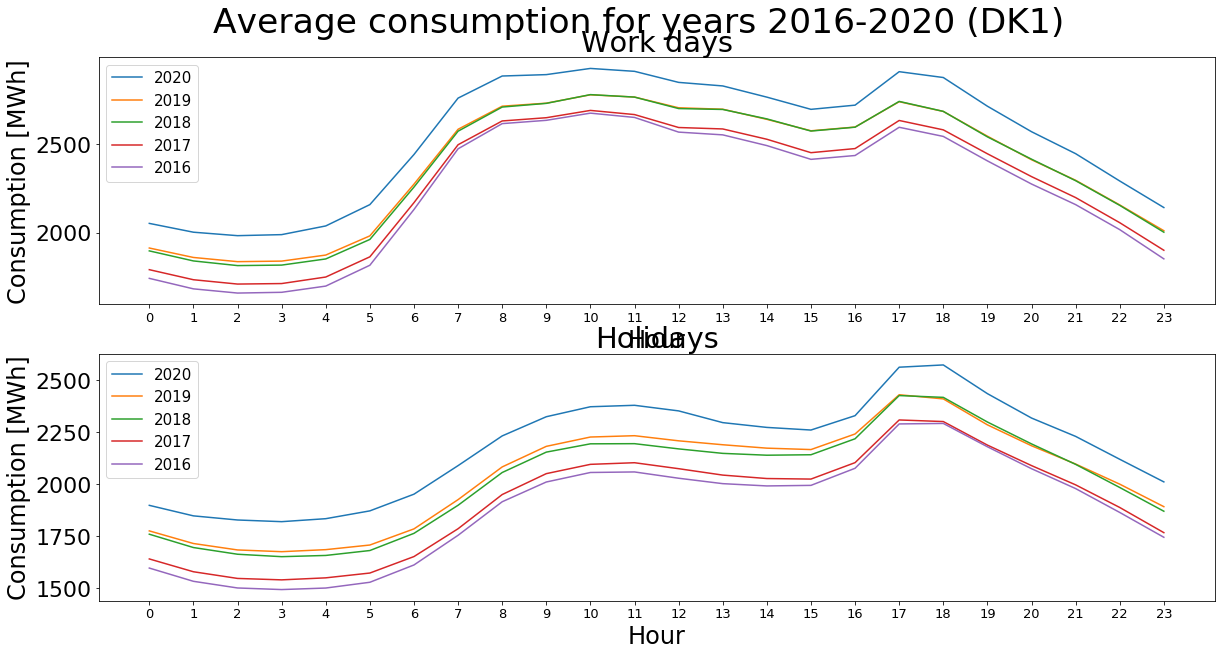

In [173]:
draw_two_plots_hour_for_year(data_avg_by_year_per_holiday, ['Work days','Holidays'], ylabel)
savePlot('avg_workday_holiday')

In [174]:
data_avg_by_year_per_dayofweek = data.copy()
df = data_avg_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).mean()
data_avg_by_year_per_dayofweek = df

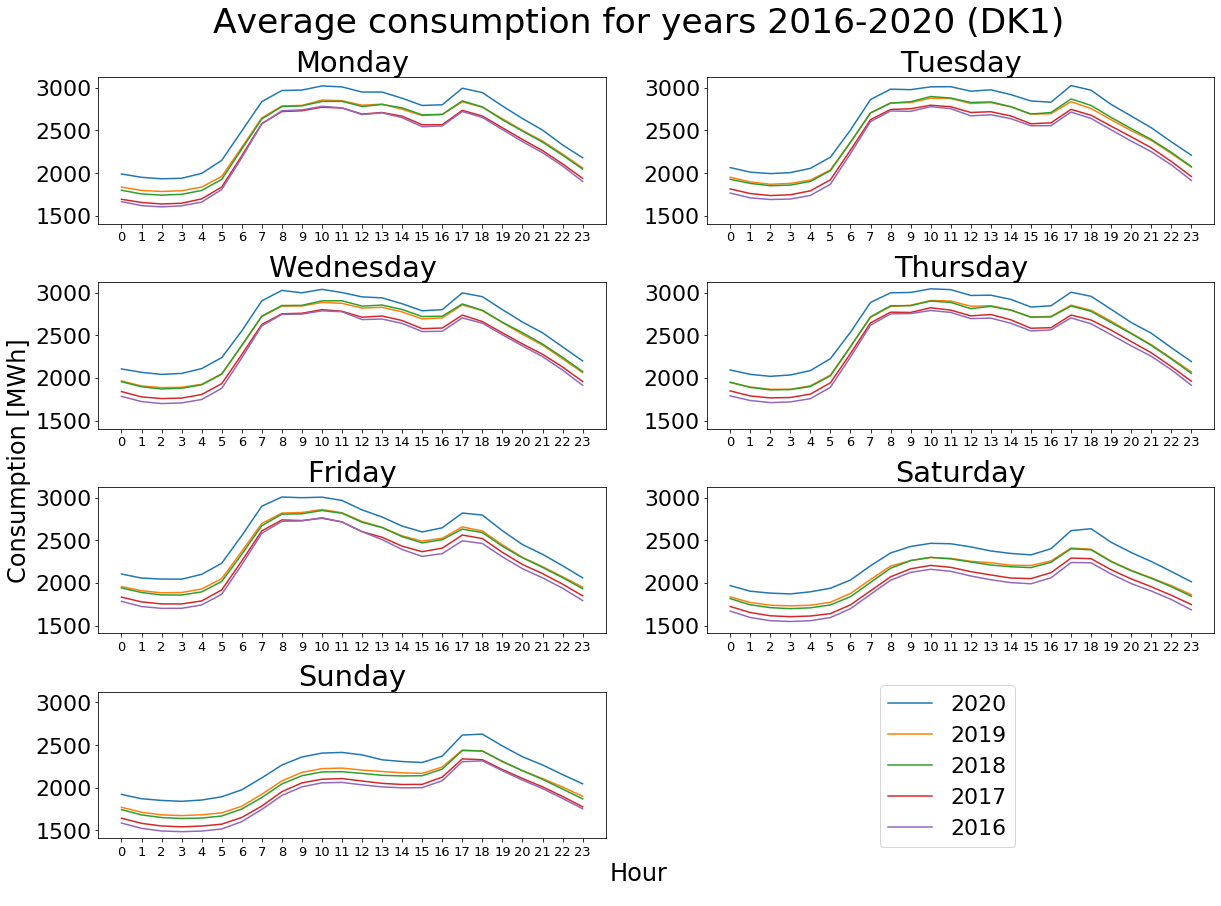

In [175]:
draw_7_plots_hour_for_year(data_avg_by_year_per_dayofweek, str_week_list, ylabel, title['avg_per_dayofweek'])
savePlot('avg_dayofweek')

In [11]:
data_std_by_year_per_dayofweek = data.copy()
df = data_std_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).std()
data_std_by_year_per_dayofweek = df
data_std_by_year_per_dayofweek

0           1           2           3           4  \
dayofweek year                                                               
0         2016  104.860804  103.622705  100.590451  106.559667  116.415351   
          2017  110.681162  113.148133  112.742090  119.722642  132.617058   
          2018  143.724726  144.620230  146.304710  150.562632  158.590226   
          2019  104.572590  102.743141  105.529381  111.390424  120.759898   
          2020   77.784120   77.390889   77.962891   76.752318   72.282330   
1         2016  106.262779  105.539610  106.530126  108.736669  116.492609   
          2017  121.587057  120.369601  120.705485  124.058108  134.694574   
          2018  137.078342  137.859771  137.317918  140.951034  147.893703   
          2019  103.012267  103.764749  104.024171  111.883094  121.312541   
          2020   70.373855   76.299847   74.709418   76.352254   76.942296   
2         2016  105.986745  104.841062  104.513126  111.651829  122.610770   
          2017  114.340670  114.147902  113.693536  120.517655  132.316812   
          2018  138.777927  138.537889  141.762314  145.892797  155.278136   
          2019  104.121405  104.595667  104.424419  108.516228  118.693397   
          2020   74.220062   69.296677   69.124686   67.969933   78.901134   
3         2016  107.183727  108.779845  110.465619  111.838032  120.660172   
          2017  124.955177  127.703849  127.187673  129.908602  140.240477   
          2018  140.705708  140.494834  140.469157  142.327710  150.234288   
          2019  102.789036  101.969788  104.587162  106.878631  114.969221   
          2020   68.287670   66.639504   74.355268   72.877931   79.056363   
4         2016  106.466099  106.032126  106.611346  107.034576  115.483440   
          2017  126.461520  123.852447  122.557415  124.922051  133.244610   
          2018  144.097473  146.011232  145.432057  148.973288  159.887232   
          2019  108.213223  108.766601  109.533752  113.265525  122.511555   
          2020   70.522942   68.571828   67.863780   66.496683   74.604595   
5         2016  117.276761  112.723763  110.831349  113.252855  121.962528   
          2017  136.923869  132.598276  130.265797  131.467756  137.862090   
          2018  150.736867  148.814151  148.248731  152.329746  159.714876   
          2019  122.735187  122.254217  121.019276  122.241786  130.033484   
          2020   87.558802   79.815247   84.406667   83.801736   80.156244   
6         2016  118.402353  116.093222  111.936278  112.927417  120.273689   
          2017  138.656141  135.894841  136.563475  136.976747  146.420055   
          2018  155.570279  158.935489  157.146998  160.385841  163.530372   
          2019  116.931564  115.858919  115.401229  113.043872  121.323376   
          2020   86.722013   89.514153   86.628973   82.925317   86.145260   

                         5           6           7           8           9  \
dayofweek year                                                               
0         2016  134.510675  169.575989  199.756599  186.201230  173.731249   
          2017  150.654821  179.005045  197.740878  179.044687  168.893385   
          2018  171.971437  198.416737  220.770348  204.527049  189.977203   
          2019  137.261402  168.971354  190.547601  173.848787  160.004583   
          2020   87.277954  135.933146  147.445526  133.904219  133.188598   
1         2016  139.607891  169.450611  191.910228  178.011248  169.762520   
          2017  152.939475  182.352331  202.367348  195.375108  177.811182   
          2018  162.810571  191.660985  210.531688  200.023060  191.725664   
          2019  137.537335  166.450949  190.845945  176.800395  159.781456   
          2020   93.206148  140.583849  164.988499  153.143895  156.193369   
2         2016  136.695888  166.571967  193.619267  173.209274  153.394024   
          2017  151.330742  175.178791  191.714055  174.308489  159.297766   
          2018  171.272067  193.804336  208.39

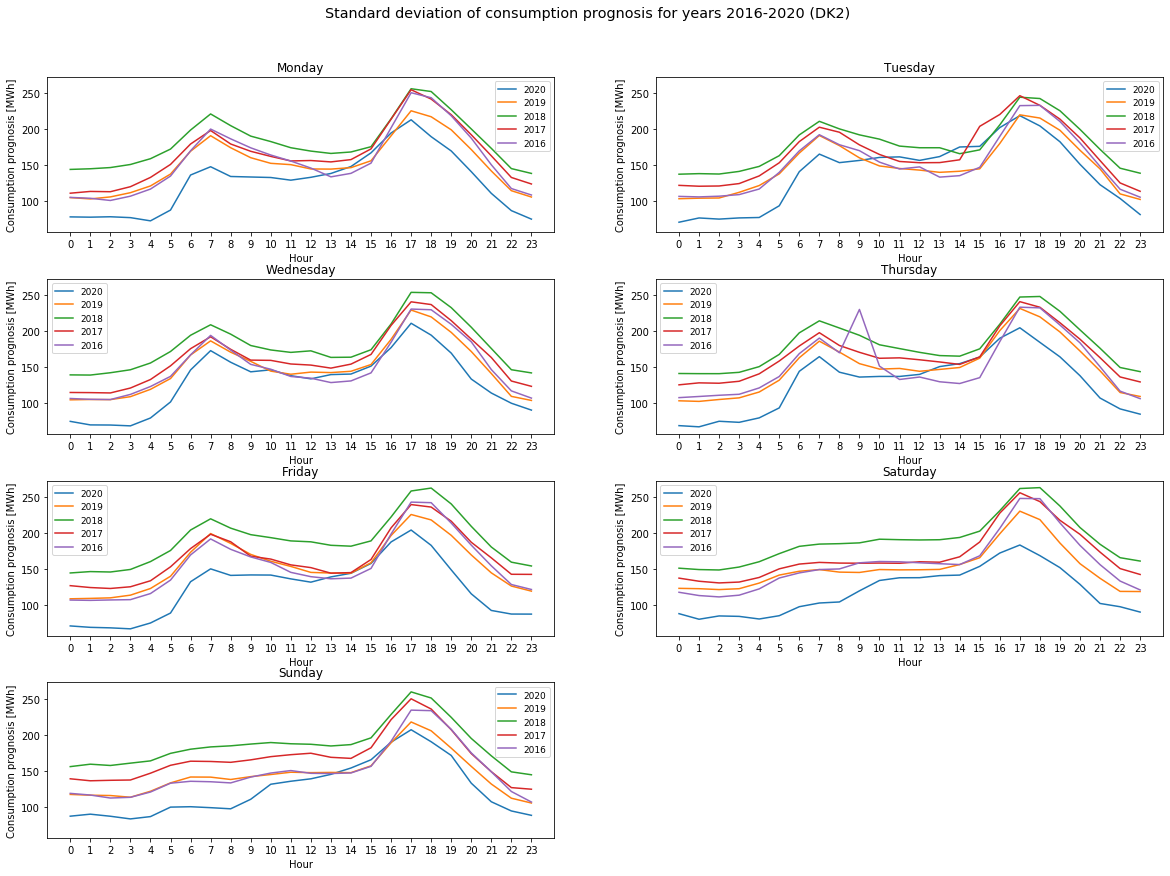

In [12]:
draw_7_plots_hour_for_year(data_std_by_year_per_dayofweek, str_week_list, ylabel, title['std_per_dayofweek'])
savePlot('std_dayofweek')

In [13]:
data_median_by_year_per_dayofweek = data.copy()
df = data_median_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).mean()
data_median_by_year_per_dayofweek = df
data_median_by_year_per_dayofweek

0            1            2            3  \
dayofweek year                                                       
0         2016  1149.591837  1099.959184  1077.244898  1080.530612   
          2017  1127.183673  1075.428571  1056.632653  1064.224490   
          2018  1172.489796  1122.775510  1099.877551  1104.653061   
          2019  1165.666667  1115.647059  1097.431373  1103.333333   
          2020  1255.611111  1203.944444  1184.722222  1182.722222   
1         2016  1186.423077  1131.692308  1105.634615  1109.557692   
          2017  1172.784314  1116.862745  1095.529412  1094.529412   
          2018  1210.240000  1157.900000  1134.560000  1136.900000   
          2019  1201.411765  1151.274510  1131.176471  1135.333333   
          2020  1253.578947  1208.000000  1183.947368  1194.000000   
2         2016  1194.423077  1138.865385  1112.288462  1113.288462   
          2017  1176.769231  1120.538462  1097.230769  1101.346154   
          2018  1211.352941  1158.333333  1136.078431  1137.823529   
          2019  1207.720000  1155.540000  1137.900000  1138.060000   
          2020  1269.500000  1217.833333  1201.111111  1205.166667   
3         2016  1200.340000  1139.920000  1115.000000  1119.640000   
          2017  1191.140000  1133.820000  1110.900000  1112.600000   
          2018  1214.160000  1157.240000  1134.740000  1134.920000   
          2019  1207.551020  1151.469388  1130.673469  1131.000000   
          2020  1287.833333  1236.666667  1212.666667  1215.388889   
4         2016  1196.520000  1134.620000  1108.020000  1111.260000   
          2017  1179.120000  1122.800000  1096.920000  1096.460000   
          2018  1224.600000  1167.160000  1141.920000  1139.980000   
          2019  1214.980000  1160.900000  1137.100000  1138.320000   
          2020  1301.117647  1246.705882  1220.352941  1224.058824   
5         2016  1205.346154  1141.519231  1106.019231  1094.711538   
          2017  1195.673077  1130.326923  1095.192308  1084.615385   
          2018  1219.750000  1158.269231  1126.000000  1115.038462   
          2019  1222.730769  1167.846154  1134.461538  1122.346154   
          2020  1269.894737  1215.842105  1182.526316  1172.789474   
6         2016  1186.480769  1125.326923  1089.990385  1073.788462   
          2017  1180.886792  1120.528302  1085.264151  1071.207547   
          2018  1216.923077  1158.019231  1123.798077  1112.403846   
          2019  1202.596154  1149.750000  1113.701923  1101.153846   
          2020  1260.473684  1210.684211  1177.631579  1163.052632   

                          4            5            6            7  \
dayofweek year                                                       
0         2016  1105.612245  1192.591837  1410.673469  1640.265306   
          2017  1086.387755  1172.142857  1394.163265  1625.591837   
          2018  1124.122449  1209.693878  1429.081633  1650.489796   
          2019  1126.647059  1208.450980  1417.960784  1630.823529   
          2020  1199.166667  1282.833333  1478.055556  1681.222222   
1         2016  1131.461538  1218.096154  1426.019231  1648.384615   
          2017  1115.176471  1199.725490  1422.450980  1644.764706   
          2018  1155.940000  1235.940000  1455.840000  1675.200000   
          2019  1154.784314  1238.960784  1448.627451  1662.490196   
          2020  1211.315789  1291.052632  1478.526316  1681.263158   
2         2016  1132.826923  1216.634615  1431.230769  1653.173077   
          2017  1119.288462  1208.211538  1432.134615  1657.730769   
          2018  1158.980392  1248.862745  1464.862745  1682.156863   
          2019  1158.000000  1240.640000  1447.680000  1663.320000   
          2020  1225.722222  1309.277778  1498.055556  1693.222222   
3         2016  1133.020000  1218.380000  1430.220000  1654.740000   
          2017  1133.420000  1216.300000  1435.180000  1662.380000   
          2018  1152.160000  1239.600000  1456.400000  1674.360000   
          2019  1150.510204  1236.6

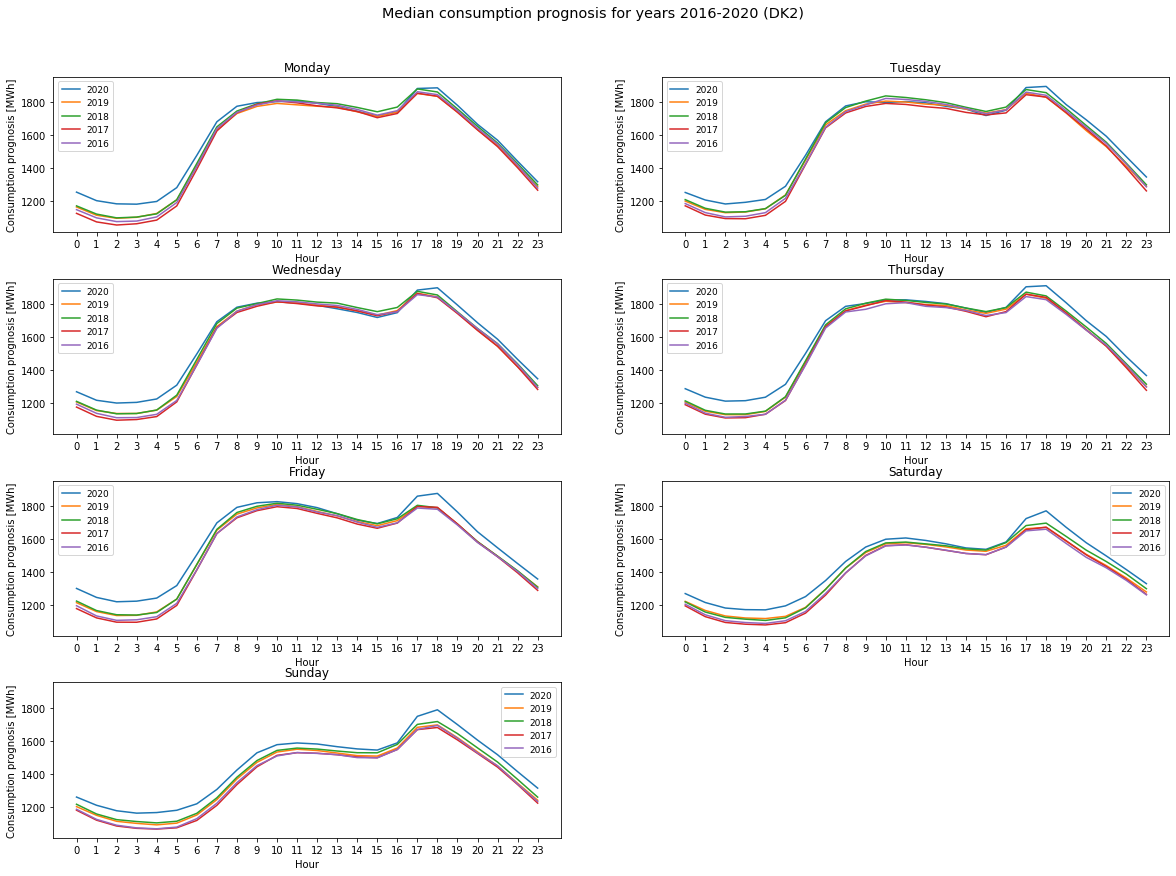

In [14]:
draw_7_plots_hour_for_year(data_median_by_year_per_dayofweek, str_week_list, ylabel, title['median_per_dayofweek'])
savePlot('median_dayofweek')

In [8]:
data_total_per_day_of_year = data.copy()
df = data_total_per_day_of_year
df = df.drop(columns=['holiday','date','dayofweek'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour"})
df = df.groupby(['year','dayofyear']).sum()
df['sma'] = df.rolling(14,min_periods=1).mean()
df = df.drop(columns=[0])
data_total_per_day_of_year = df
data_total_per_day_of_year

sma
year dayofyear              
2016 1          13265.000000
     2          39418.000000
     3          50390.000000
     4          53892.500000
     5          53156.800000
...                      ...
2020 129        21424.214286
     130        21039.571429
     131        22791.714286
     132        24518.500000
     133        27412.500000

[1594 rows x 1 columns]

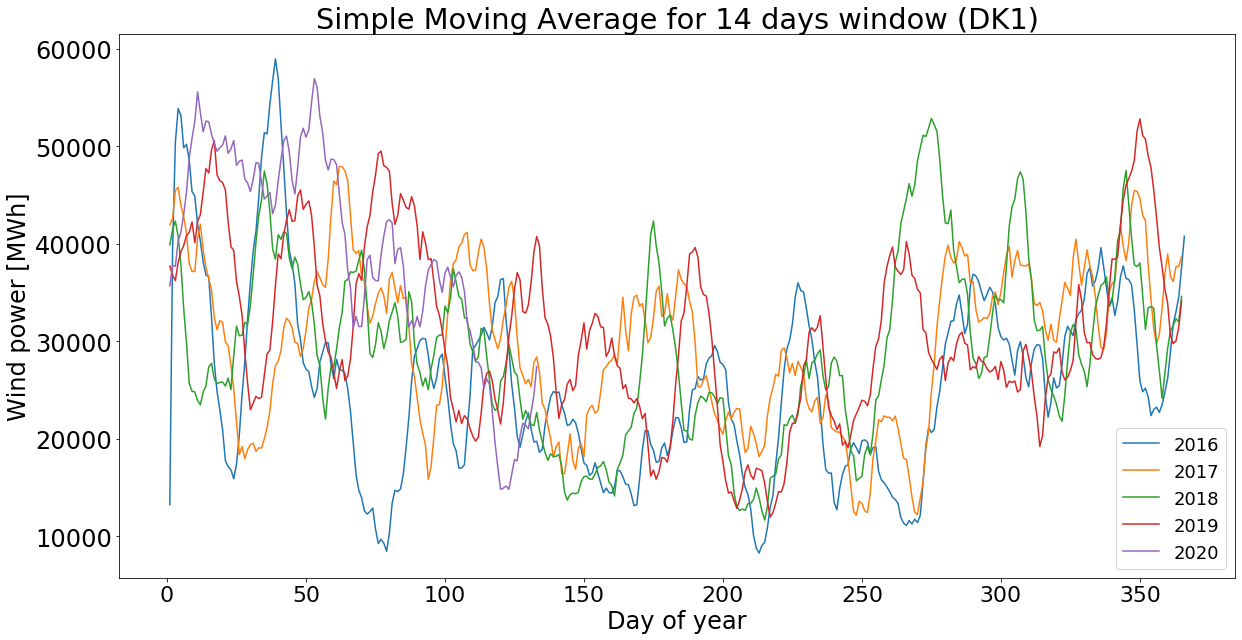

In [9]:
draw_plot_dayofyear(data_total_per_day_of_year, title['sma_per_dayofyear'],ylabel)
savePlot('sma_14days')

In [17]:
data_total_per_day_of_year = data.copy()
df = data_total_per_day_of_year
df = df.drop(columns=['holiday','date','dayofweek'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour"})
df = df.groupby(['year','dayofyear']).sum()
df['sma'] = df.rolling(14,min_periods=1).mean()
df = df.drop(columns=[0])
data_total_per_day_of_year = df
data_total_per_day_of_year

sma
year dayofyear              
2016 1          34131.000000
     2          35846.000000
     3          36590.666667
     4          38307.750000
     5          39491.000000
...                      ...
2020 129        32939.714286
     130        32847.357143
     131        32778.428571
     132        32779.142857
     133        32862.642857

[1594 rows x 1 columns]

In [26]:
data_per_year = data.copy()
df = data_per_year
df = df.drop(columns=['holiday','date','dayofweek','dayofyear'])
df = df.set_index(['year']).stack().reset_index().rename(columns={"level_1": "hour"})
df = df.groupby(['year']).median()
# df.iloc[:,0] = df.iloc[:,0] / 1000000
# df = df.iloc[:-1,:]
data_per_year = df
data_per_year

,0
year,
2016,184.435
2017,224.005
2018,329.235
2019,289.270
2020,142.520


In [12]:
draw_simple_barplot_for_years(data_per_year,title['total_consumption_2016_2019'], ylabel = ylabelTWh)
savePlot('total_year')

NameError: name 'draw_simple_barplot_for_years' is not defined

In [212]:
data_one_year = data.copy()
df = data_one_year
df['day'] = df['date'].dt.strftime('%m-%d')
df = df[df.year == 2019]
# df = df.set_index(['day'])
df = df.drop(columns=['date','year','holiday','dayofweek','dayofyear'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['day']).stack().reset_index()
df = df.groupby(['day']).sum()
data_one_year = df

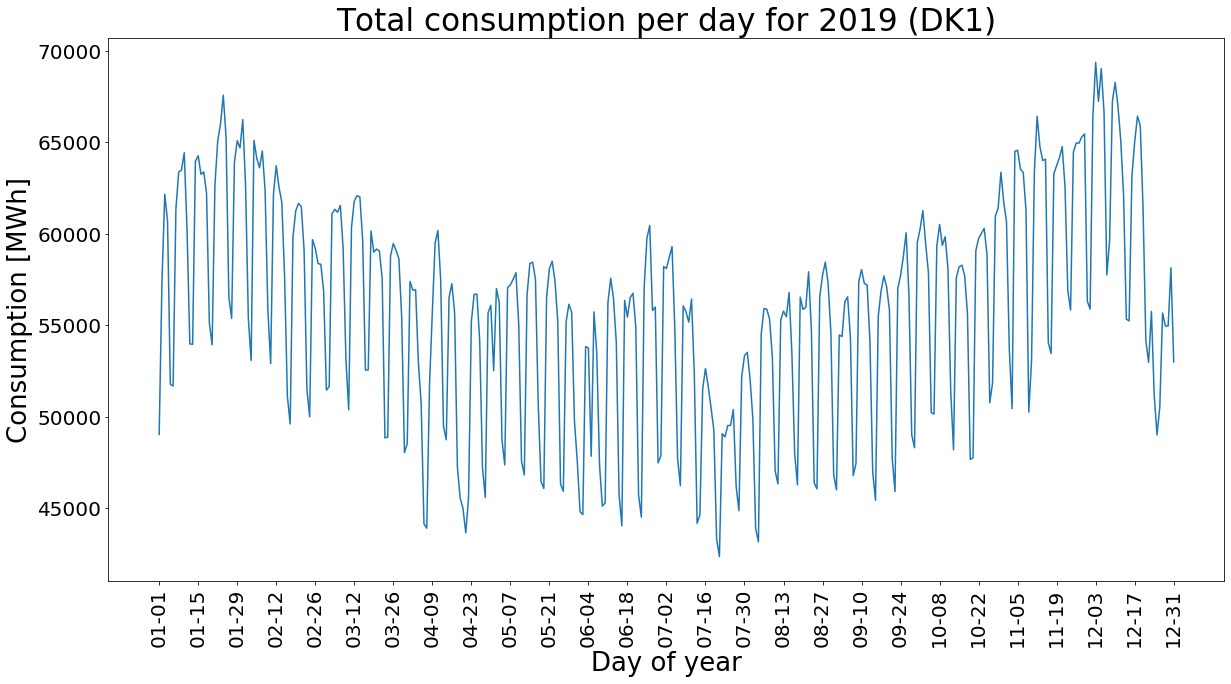

In [213]:
draw_plot_single_dayofyear(data_one_year, title['total_consumption_2019'])
savePlot('total_day_2019')

In [15]:
data_per_year = data.copy()
df = data_per_year
df = df.drop(columns=['holiday','date','dayofweek','dayofyear'])
df = df.set_index(['year']).stack().reset_index().rename(columns={"level_1": "hour"})
df = df.groupby(['year']).sum()
df.iloc[:,0] = df.iloc[:,0] / 1000000
df = df.iloc[:-1,:]
data_per_year = df
data_per_year

,0
year,
2016,19.148013
2017,19.410057
2018,20.282469
2019,20.373176
